# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


In [35]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
# Import dataset
# Your code here
data = pd.read_csv('./data/train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [64]:
# For easy to handle, we use a small pice of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
# Your code here
data.sample(5000)
data.reset_index(inplace=True, drop=True)

In [65]:
# Let's take a look at first 5 rows ()
# Your code here
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

In [66]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
# Your code here
data.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [67]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
# Your code here
X = data.drop('label', axis=1).values
y = data['label'].values


In [68]:
X.shape
# data.shape

(42000, 784)

In [69]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)


Label: 8


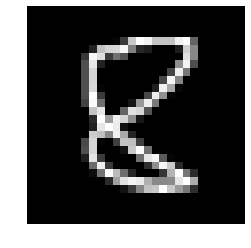

In [70]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
index = 36
print("Label: " + str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

In [71]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here
rf = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [72]:
# Let's fit training data to Random Forest Classifier
# Your code here
rf.fit(X_train, y_train)

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
# Let's fit training data to Decision Tree Classifier
# Your code here
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
# Your code here
prediction_rfc = rf.predict(X_test)
accuracy_score(y_test, prediction_rfc)

0.938952380952381

In [91]:
# Decision Tree model
# Your code here
prediction_dtc = dtc.predict(X_test)
accuracy_score(y_test, prediction_dtc)

0.8545714285714285

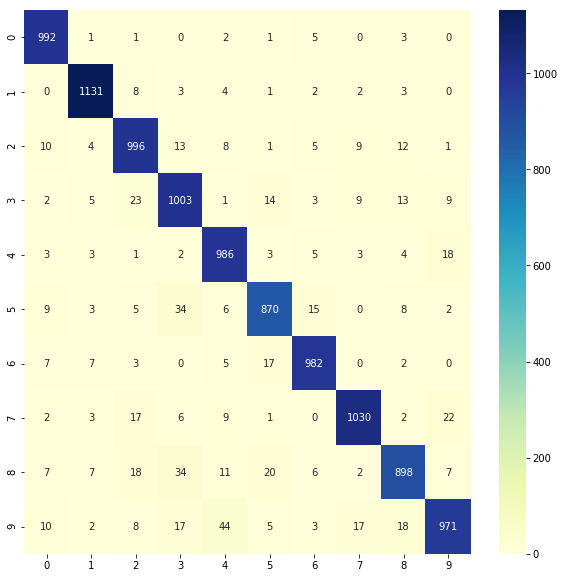

In [98]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
# Your code here
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, prediction_rfc), cmap='YlGnBu', annot = True, fmt='d')
plt.show()

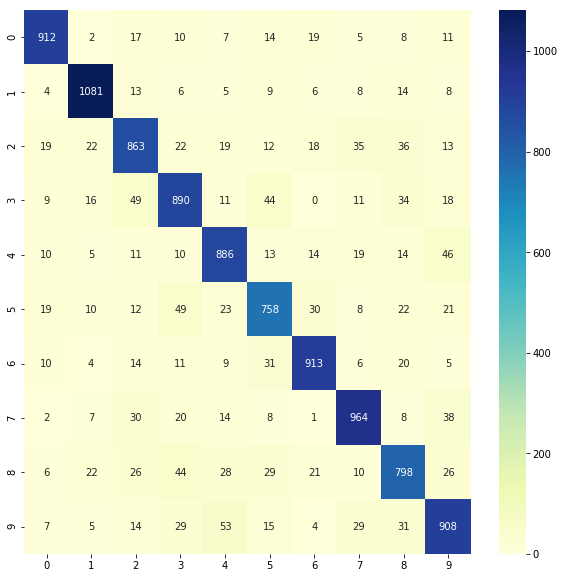

In [99]:
# And heatmap for confusion matrix of Decision Tree model
# Your code here
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test, prediction_dtc), cmap='YlGnBu', annot = True, fmt='d')

In [ ]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?

# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n, result)
print(result)

## Great job!